In [ ]:
#Praneetha Babburi
#700757931

In [10]:
#Question 1
import pandas as pd

#Read the provided CSV file ‘data.csv’
data=pd.read_csv("data.csv")

#Show the basic statistical description about the data
data.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [11]:
#Check if the data has null values.
data.isnull()

#Replace the null values with the mean
data.fillna(data.mean(numeric_only=True), inplace=True)
print(data.isnull().sum())


Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


In [12]:
#Select at least two columns and aggregate the data using: min, max, count, mean.
columns=['Pulse','Maxpulse']
two_agg=data[columns].agg(['min', 'max', 'count', 'mean'])
print(two_agg)


            Pulse    Maxpulse
min     80.000000  100.000000
max    159.000000  184.000000
count  169.000000  169.000000
mean   107.461538  134.047337


In [13]:
#Filter the dataframe to select the rows with calories values between 500 and 1000.
print(data[(data['Calories']>500)&(data['Calories']<1000)])


     Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
90        180    101       127     600.1
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [14]:
#Filter the dataframe to select the rows with calories values > 500 and pulse < 100.
print(data[(data['Calories']>500)&(data['Pulse']<100)])


     Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [15]:
#Create a new “df_modified” dataframe that contains all the columns from df except for
#“Maxpulse”.
df_modified = data.drop(columns=['Maxpulse'])
print(df_modified)

     Duration  Pulse  Calories
0          60    110     409.1
1          60    117     479.0
2          60    103     340.0
3          45    109     282.4
4          45    117     406.0
..        ...    ...       ...
164        60    105     290.8
165        60    110     300.0
166        60    115     310.2
167        75    120     320.4
168        75    125     330.4

[169 rows x 3 columns]


In [16]:
#Delete the “Maxpulse” column from the main df dataframe
data.drop(columns=['Maxpulse'], inplace=True)
print(data)

     Duration  Pulse  Calories
0          60    110     409.1
1          60    117     479.0
2          60    103     340.0
3          45    109     282.4
4          45    117     406.0
..        ...    ...       ...
164        60    105     290.8
165        60    110     300.0
166        60    115     310.2
167        75    120     320.4
168        75    125     330.4

[169 rows x 3 columns]


In [17]:
#Convert the datatype of Calories column to int datatype
data['Calories'] = data['Calories'].astype(int)
print(data.dtypes)

Duration    int64
Pulse       int64
Calories    int64
dtype: object


In [18]:
from matplotlib import pyplot as plt

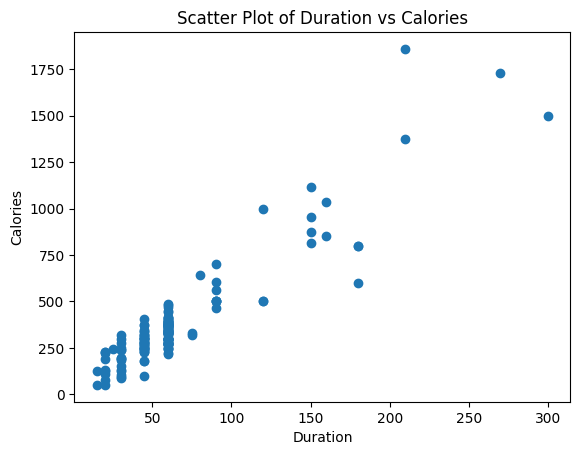

In [19]:
#Using pandas create a scatter plot for the two columns (Duration and Calories).
plt.scatter(data['Duration'], data['Calories'])
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.title('Scatter Plot of Duration vs Calories')
plt.show()

In [20]:
#question 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the datasets

data = pd.read_csv('Salary_Data.csv')

X = data[['YearsExperience']]  #independent variable in a 2D dataframe
Y = data['Salary']  #Dependent variable as a 1D series

In [21]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=1/3,random_state = 0)

In [22]:
# Fitting Simple Linear Regression to the training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)     # Train the model


LinearRegression()

In [23]:
# Predicting the Test set result ￼

Y_Pred_Test = regressor.predict(X_Test)
Y_Pred_Train = regressor.predict(X_Train)


In [24]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(Y_Train, Y_Pred_Train)
mse_test = mean_squared_error(Y_Test, Y_Pred_Test)
print("Mean Squared Error (Train): ",mse_train)
print("Mean Squared Error (Test): ",mse_test)

Mean Squared Error (Train):  36852948.76438455
Mean Squared Error (Test):  21026037.329511296


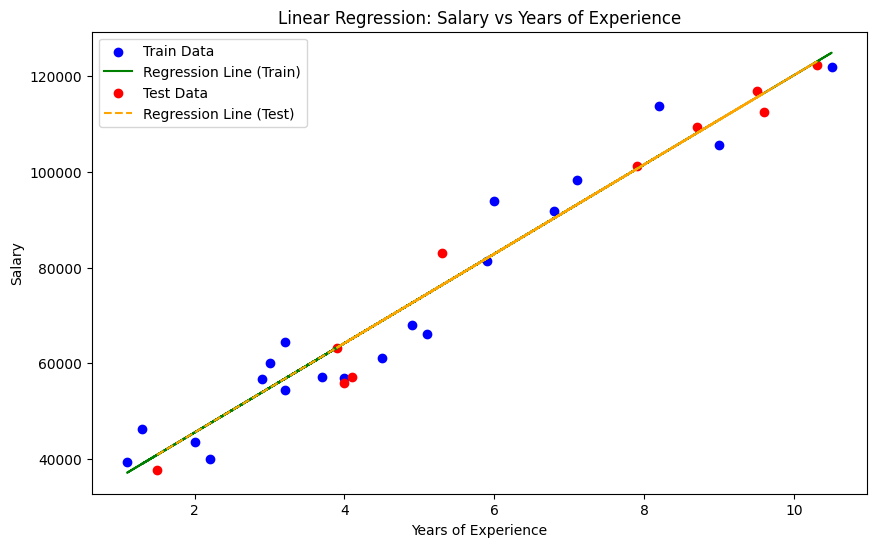

In [25]:
# Visualize both train and test data using scatter plot
plt.figure(figsize=(10, 6))

# Training data plot
plt.scatter(X_Train, Y_Train, color='blue', label='Train Data')  #Plots the actual training data points in blue.
plt.plot(X_Train, Y_Pred_Train, color='green', label='Regression Line (Train)')  #Draws the regression line for training data in green.

# Test data plot
plt.scatter(X_Test, Y_Test, color='red', label='Test Data')  #Plots the actual test data points in red
plt.plot(X_Test, Y_Pred_Test, color='orange', linestyle='--', label='Regression Line (Test)')  #Draws the regression line for test data in orange (dashed)

# Plot labels and legend
plt.title("Linear Regression: Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

Video Link:
https://drive.google.com/file/d/1SBQdFHQfzbwHvC2iD9QnglrV_gdUIsTC/view?usp=sharing
